In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loss: 0.020575204386343388
Accuracy: 1.0
w, b: [array([[ 0.20694563,  0.41378237, -0.90993041, -0.41325769]]), 0.3430000000000002]
Loss: 0.03433091992275395
Accuracy: 0.7555555555555555
w, b: [array([[ 0.41335114, -1.3646713 ,  0.43652066, -1.08903267]]), 1.1850000000000045]
Loss: 0.6750195947801084
Accuracy: 0.9111111111111111
w, b: [array([[-1.30404461, -0.94290216,  1.95242666,  1.65046041]]), -2.0199999999999516]
Accuracy:  1.0


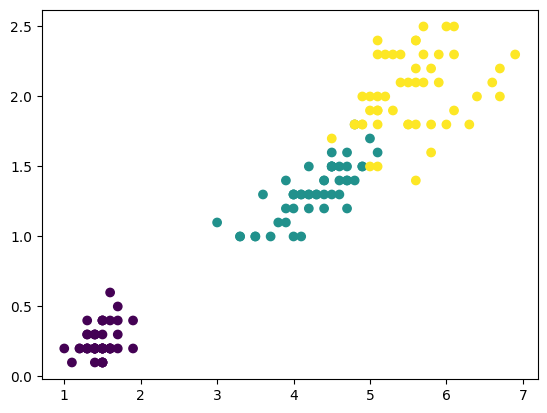

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

dff=pd.read_csv('/content/drive/MyDrive/Machine learning/Assignment/Assignment 7/IRIS.csv')

#split
X = dff.iloc[:, :-1].values
Y = dff.iloc[:, -1].values#.reshape(-1,1)
#categorical to integral
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=Y
y = le.fit_transform(y)


#model from scratch
class SVM:
    def __init__(self, C = 1.0):
        # C = error term needed for optimizing
        self.C = C
        self.w = 0
        self.b = 0

    # Hinge Loss Function / Calculation
    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            #        = y(wx+b)
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculating loss
            #hinge loss = regularization term + C. max(0, 1-optimization_term)
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # The number of Samples in X and no of features in X
        number_of_samples, number_of_features = X.shape

        c = self.C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Appending all losses 
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):
        
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)


y1=np.where(y==0, 1, -1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y1, test_size=.3, random_state=0)

svm=SVM()
w, b, losses = svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
# Loss value
lss = losses.pop()
print("Loss:", lss)
print("Accuracy:", accuracy_score(Y_pred, Y_test))
print("w, b:", [w, b])


y2=np.where(y==1, 1, -1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y2, test_size=.3, random_state=0)

w, b, losses = svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
# Loss value
lss = losses.pop()
print("Loss:", lss)
print("Accuracy:", accuracy_score(Y_pred, Y_test))
print("w, b:", [w, b])


y3=np.where(y==2, 1, -1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y3, test_size=.3, random_state=0)

w, b, losses = svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)

# Loss value
lss = losses.pop()
print("Loss:", lss)
print("Accuracy:", accuracy_score(Y_pred, Y_test))
print("w, b:", [w, b])


# Visualizing the scatter plot of the dataset
plt.scatter(X[:, 2], X[:, 3], c=y)






X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.3, random_state=42)
#Sklearn model
model = SVC(kernel='linear') 
# fitting x samples and y classes 
model.fit(X_train, Y_train)
model.score(X_test, Y_test)
yPred = model.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, yPred))
